___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 50
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.0987921
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 100
   
   Predicting ...
   Predicting - done. Time (sec):  0.0002937
   
   Prediction time/pt. (sec) :  0.0000029
   


Text(0, 0.5, '$y$')

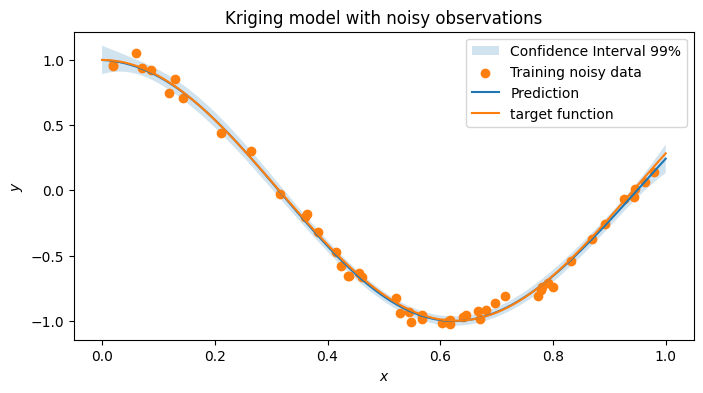

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from smt.surrogate_models import KRG

# defining the toy example
def target_fun(x):
    import numpy as np

    return np.cos(5 * x)

nobs = 50  # number of obsertvations
np.random.seed(0)  # a seed for reproducibility
xt = np.random.uniform(size=nobs)  # design points

# adding a random noise to observations
yt = target_fun(xt) + np.random.normal(scale=0.05, size=nobs)

# training the model with the option eval_noise= True
sm = KRG(eval_noise=True, hyper_opt="Cobyla")
sm.set_training_values(xt, yt)
sm.train()

# predictions
x = np.linspace(0, 1, 100).reshape(-1, 1)
y = sm.predict_values(x)  # predictive mean
var = sm.predict_variances(x)  # predictive variance

# plotting predictions +- 3 std confidence intervals
plt.rcParams["figure.figsize"] = [8, 4]
plt.fill_between(
    np.ravel(x),
    np.ravel(y - 3 * np.sqrt(var)),
    np.ravel(y + 3 * np.sqrt(var)),
    alpha=0.2,
    label="Confidence Interval 99%",
)
plt.scatter(xt, yt, label="Training noisy data")
plt.plot(x, y, label="Prediction")
plt.plot(x, target_fun(x), label="target function")
plt.title("Kriging model with noisy observations")
plt.legend(loc=0)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")